# Number Image Prediction Model

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [3]:
print(digits.data.shape)

(1797, 64)


In [4]:
print(digits.target.shape)

(1797,)


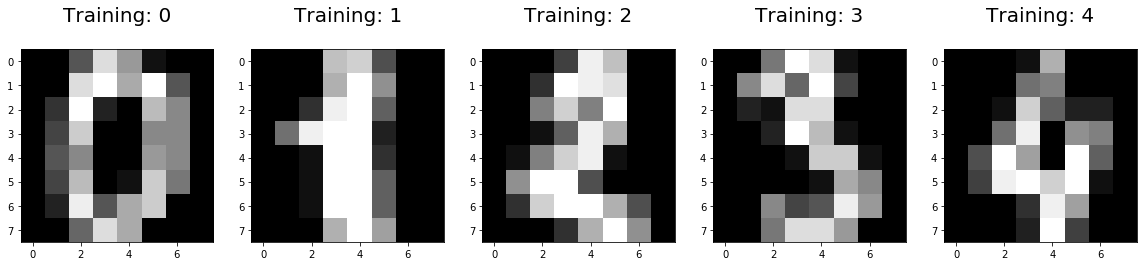

In [5]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label,fontsize =20)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [7]:
print(x_train.shape)

(1383, 64)


In [8]:
print(x_test.shape)

(414, 64)


In [9]:
print(y_train.shape)

(1383,)


In [32]:
print(y_test.shape)

(414,)


In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression()

In [13]:
lr.fit(x_train,y_train)

C:\Users\tppat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(lr.predict(x_test[0].reshape(1,-1)))

[4]


In [15]:
lr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [16]:
pred = lr.predict(x_test)

In [17]:
score = lr.score(x_test,y_test)

In [24]:
score
cm=metrics.confusion_matrix(y_test,pred)

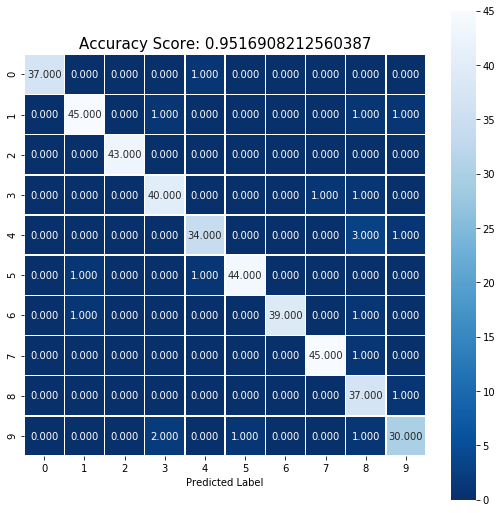

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(cm ,annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel=('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title,size=15);

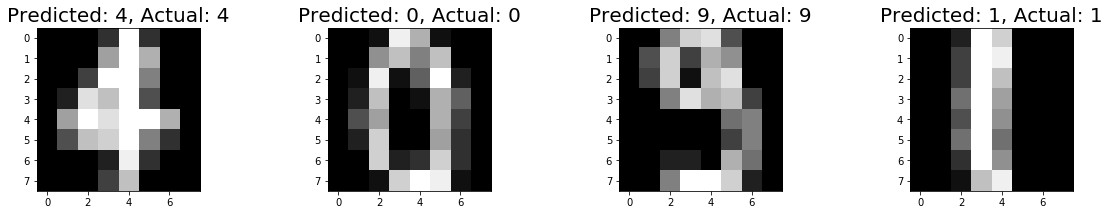

In [30]:
index=0
classifiedIndex = []
for predict,actual in zip(pred,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap = plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(pred[wrong],y_test[wrong]),fontsize=20)           
    
                   
        
        
